In [1]:
from databaker.framework import *
inputfile = "socialprotectionfrench.xlsx"
tabs = loadxlstabs(inputfile)

Loading socialprotectionfrench.xlsx which has size 156249 bytes
Table names: ['opérations_1959_2016', 'prestations_1959_2016', 'prestations_SF_SNF', 'prestations_ISBLSM', 'prestations_ASSO', 'prestations_APUC_APUL', 'opérations_SF_SNF', 'opérations_ISBLSM', 'opérations_ASSO', 'opérations_APUC_APUL']


In [10]:
tab = tabs[8]
year = tab.excel_ref("A1").fill(RIGHT).is_not_blank()
admin = tab.excel_ref("A1").fill(DOWN).is_not_blank()
obs = yearset.fill(DOWN).is_number()
hdimyear = HDim(year, "year", DIRECTLY, UP)
hdimadmin = HDim(admin, "admin", DIRECTLY, LEFT)
cseg = ConversionSegment(tab, [hdimyear, hdimadmin], obs)
savepreviewhtml(cseg)

In [34]:
data = cseg.topandas()
data["year"] = data.year.str.slice(0,4).astype(int)
data = data.set_index(["admin", "year"])
data.head()

OBS
admin                               year          
TOTAL DES EMPLOIS HORS TRANSFERTS * 1990  205624.4
                                    1991  218301.9
                                    1992  233418.0
                                    1993  247406.1
                                    1994  254695.8

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
udata = data.unstack(0)["OBS"]  # convert to a table one per type

In [58]:
udata.columns[2]

'Autres recettes (depuis 1981)'

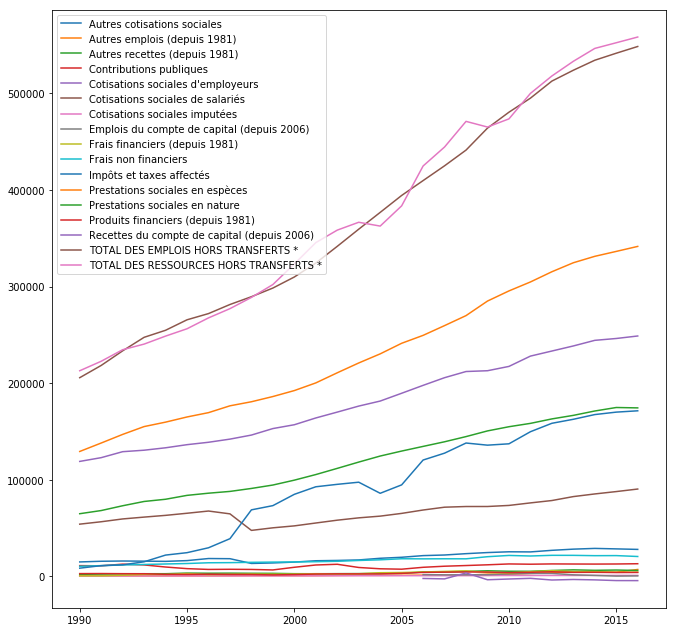

In [59]:
plt.figure(figsize=(11,11))
for col in udata.columns:
    plt.plot(udata[col], label=col)
plt.legend();

There's an inversion between ['Impôts et taxes affectés', 'Cotisations sociales de salariés'] in 1997


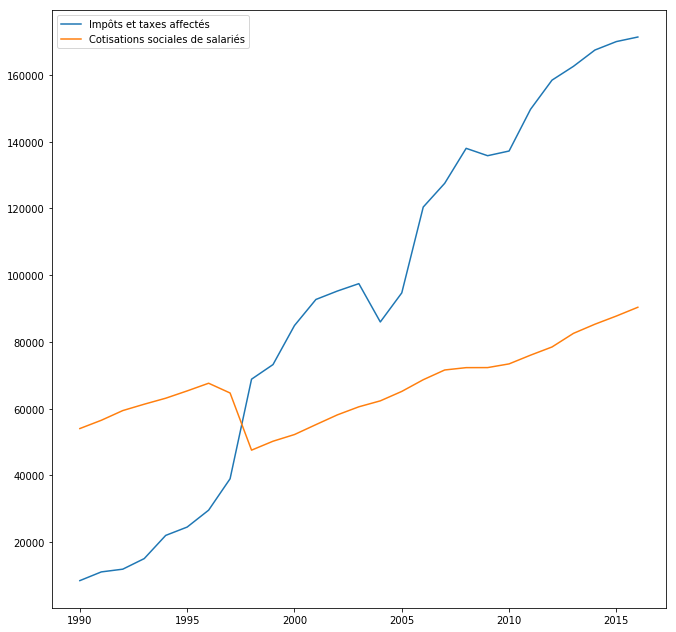

In [76]:
plt.figure(figsize=(11,11))
lcols = udata.columns
#print(lcols)
lcols = [lcols[10], lcols[5]]
print("There's an inversion between", lcols, "in 1997")
#lcols = lcols[10:]
for col in lcols:
    plt.plot(udata[col], label=col)
plt.legend();